# 📱 Lab 1: Klasifikasi SVM dengan Data Dummy Linier

## Langkah 1 - Import Library

In [2]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.2 MB/s eta 0:00:00


In [3]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Langkah 2 - Membuat Data Dummy

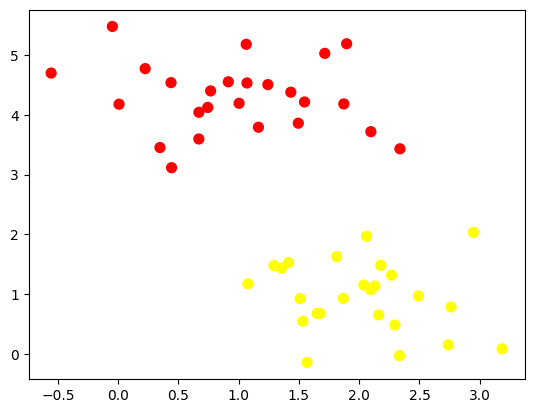

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Buat Ilustrasi Garis Pemisah

(-1.0, 3.5)

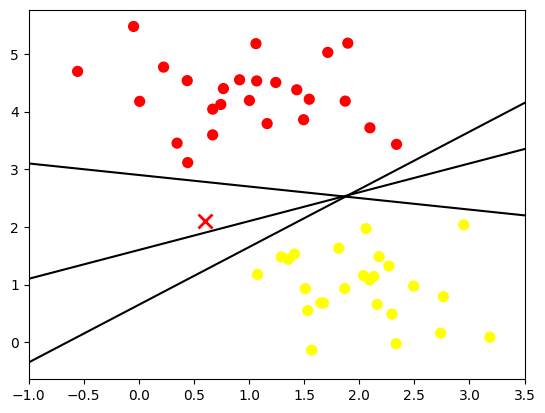

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')

plt.xlim(-1, 3.5)

## Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

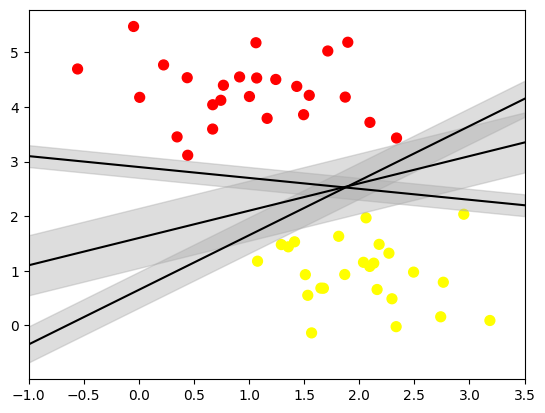

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

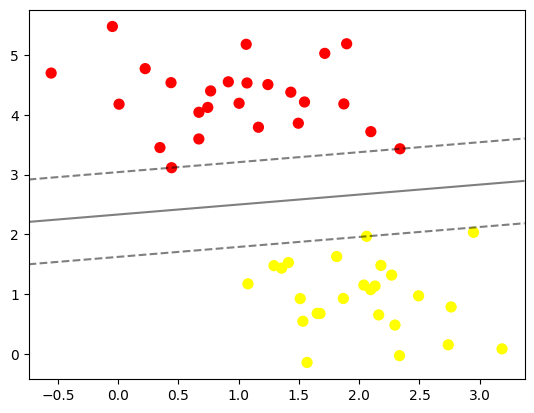

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

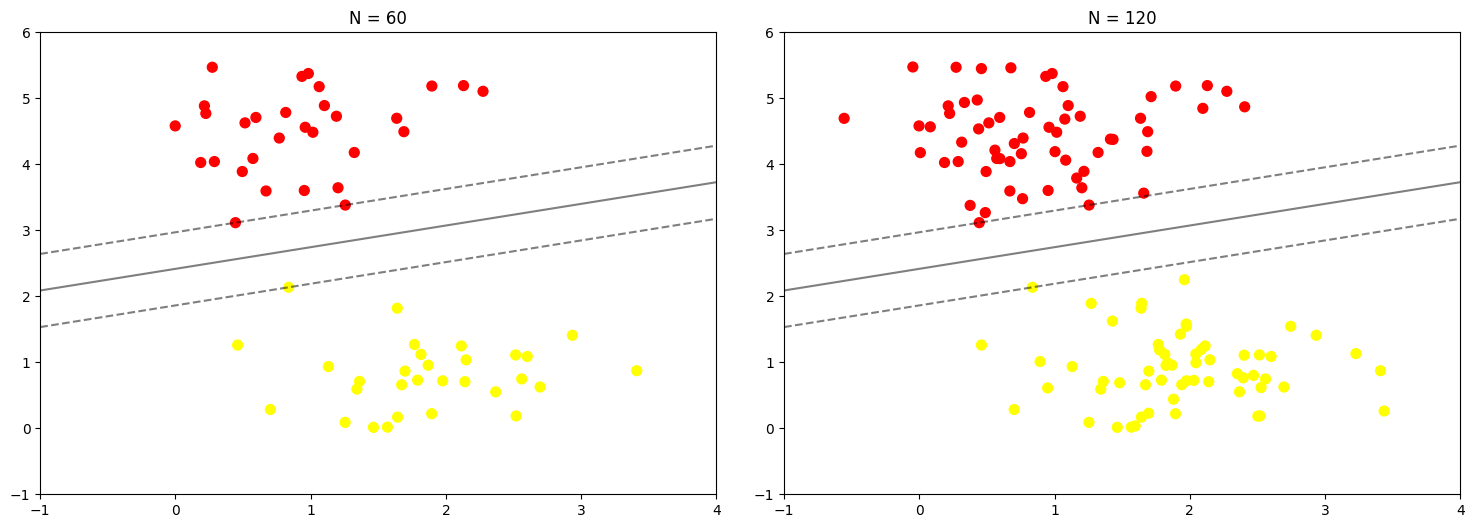

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [12]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# 💻 Lab 2 Klasifikasi SVM dengan Data Dummy Non-Linier

## Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [13]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Buat Kembali Fungsi Plotting

In [14]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Buat Data Dummy Non-Linier

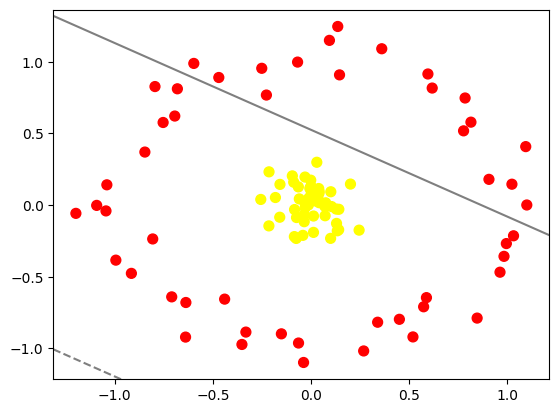

In [15]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [16]:
r = np.exp(-(X**2).sum(1))

In [17]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-3.51653672e-01, -9.72776719e-01],
       [ 6.18150701e-01,  8.16966840e-01],
       [-2.26912978e-01,  7.68134462e-01],
       [-4.11403630e-02, -2.11289640e-01],
       [-2.96093128e-02, -1.88448908e-02],
       [ 9.96148459e-01, -2.68599755e-01],
       [-9.15152913e-01, -4.76591470e-01],
       [-3.42384788e-02, -1.15909268e-01],
       [-1.58895749e-01, -8.46865224e-02],
       [ 1.42295832e-01, -2.92910043e-02],
       [ 1.09493588e+00,  4.08160215e-01],
       [ 1.00361390e-01, -2.32164257e-01],
       [ 1.02448971e+00,  1.45775647e-01],
       [-3.00553033e-02,  1.95648730e-01],
       [-2.14252282e-01, -1.45197962e-01],
       [-9.48238663e-02,  2.03910484e-01],
       [-3.50188352e-02, -6.91027095e-02],
       [ 7.22797989e-02, -7.43617268e-02],
       [-8.06414100e-01, -2.36360294e-01],
       [ 2.01573601e-01,  1.46715630e-01],
       [-8.77345929e-02,  1.59753478e-01],
       [ 2.45600018e-01, -1.74865996e-01],
       [-1.04018054e+00,  1.41557109e-01],
       [-7.94870375e-01,  8.27393211e-01],
       [ 2.10890027e-02,  2.94608535e-02],
       [-5.96966468e-01,  9.88867800e-01],
       [ 1.01364078e-01,  9.31008589e-02],
       [ 1.30557879e-01, -1.27847136e-01],
       [ 1.30586473e-02, -1.90512562e-01],
       [-6.93973359e-01,  6.21527897e-01],
       [-9.96864264e-03,  4.94924975e-02],
       [-1.81014684e-01,  5.28562739e-02],
       [-7.53418345e-01,  5.76602863e-01],
       [ 1.34342643e-01, -1.79495835e-01],
       [ 7.06567064e-02, -8.16344894e-03],
       [-2.50566790e-01,  9.54811205e-01],
       [ 7.85837335e-01,  7.47498131e-01],
       [ 1.62585854e-02,  7.07409371e-02],
       [-6.80710989e-01,  8.11732933e-01],
       [ 5.74512719e-01, -7.09779638e-01],
       [-8.33636457e-02, -3.11455385e-02],
       [ 1.29209027e-01, -2.78021021e-02],
       [ 8.47190035e-01, -7.88773876e-01],
       [ 9.84132158e-01, -3.57827674e-01],
       [ 4.50883029e-01, -7.97235322e-01],
       [-7.09536654e-01, -6.40637457e-01],
       [ 5.20027245e-01, -9.20225031e-01],
       [-7.50667877e-02, -2.32744502e-01],
       [ 1.03270735e+00, -2.14312968e-01],
       [ 1.10036119e+00,  7.18102634e-04],
       [ 2.68879586e-01, -1.01816574e+00],
       [ 5.96306504e-01,  9.15111917e-01],
       [-5.91858046e-02,  4.31578654e-02],
       [-3.09685282e-02,  1.74164904e-02],
       [-8.46377005e-01,  3.70133650e-01],
       [ 7.54838593e-02,  1.58767564e-02],
       [ 1.05109977e-01, -1.02444607e-02],
       [-8.44419239e-02, -2.19926447e-01],
       [ 3.40070883e-01, -8.17616565e-01],
       [-9.67019803e-04,  1.74048191e-01],
       [ 5.88809252e-01, -6.45955544e-01],
       [ 3.96822176e-02,  1.15556737e-01],
       [ 1.36792286e-01,  1.24674239e+00],
       [-1.30222842e-02,  8.79731217e-04],
       [-1.57804716e-01,  1.44523523e-01],
       [ 2.36890771e-03,  8.47080197e-02],
       [-6.40992841e-02,  1.27009114e-01],
       [ 4.20414646e-02,  9.47680327e-02],
       [ 9.43127769e-02,  1.14984023e+00],
       [-5.63354352e-03,  1.17057814e-01],
       [ 4.16029663e-02,  1.68047634e-02],
       [ 1.41399749e-01, -1.72276243e-01],
       [-2.13608176e-01,  2.32118480e-01],
       [ 1.96889080e-02,  4.62709551e-02],
       [-6.79761648e-02,  9.98229097e-01],
       [ 3.75872663e-02,  4.01950450e-02],
       [-3.74683645e-02, -1.09858311e+00],
       [ 3.00051356e-02,  2.98941974e-01],
       [-6.39046606e-01, -9.21369704e-01],
       [-7.34329135e-02, -8.67919500e-02],
       [ 4.09537027e-02,  8.15663230e-02],
       [ 1.45802227e-01,  9.08937151e-01],
       [ 1.42944992e-04,  1.32603214e-01],
       [-4.69538617e-01,  8.90622438e-01],
       [ 1.30979342e-02, -7.63533593e-02],
       [-2.55560074e-01,  3.94005851e-02],
       [-1.04467933e+00, -4.06531886e-02],
       [ 9.07424086e-01,  1.79727698e-01],
       [-1.09201121e+00, -2.09548011e-03],
       [ 9.63763107e-01, -4.68424208e-01],
       [-6.37399476e-01, -6.79941741e-01],
       [-6.31672664e-02, -9.62813232e-01

## Langkah 2 - Fitting Model

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

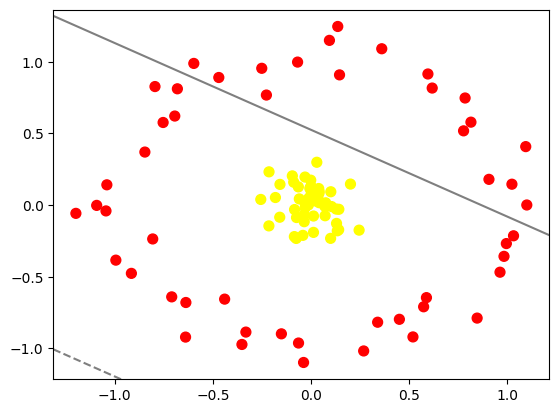

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# 🖥️ Lab 3 SVM Data Overlapping

## Langkah 1 - Import Library dan Buat Fungsi Plotting

In [19]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [20]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 2 - Buat Data Dummy

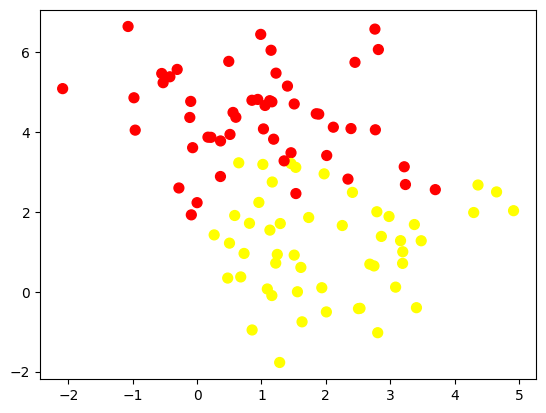

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Analisis Dampak Tunning

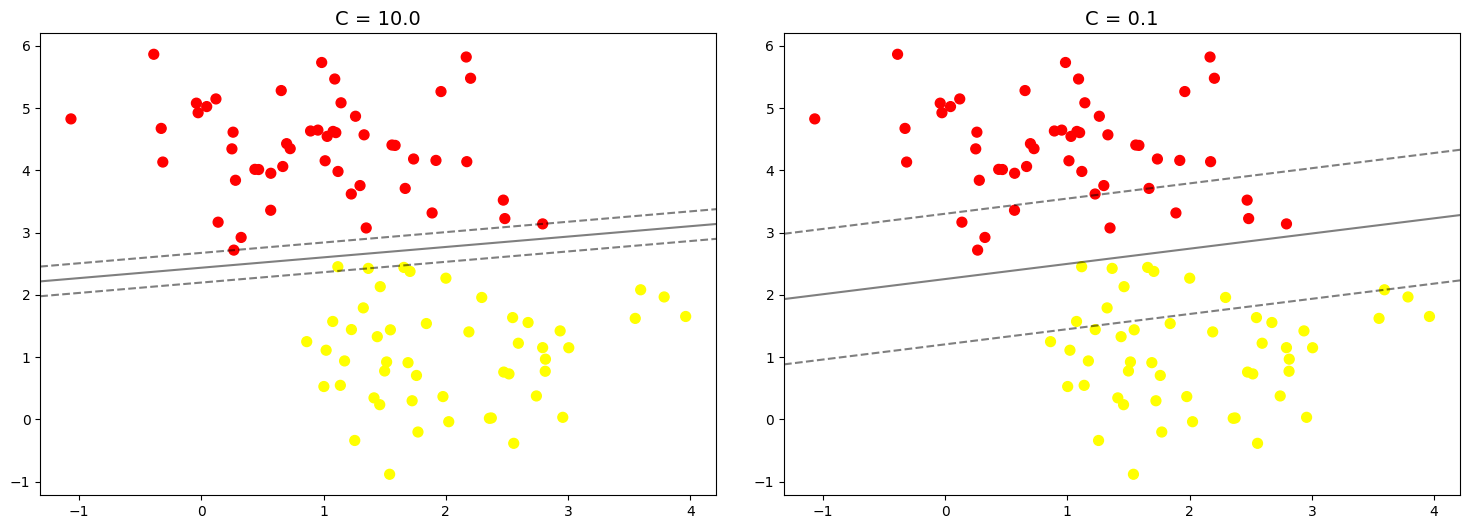

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# 🖼️ Lab 4 Klasifikasi Citra Wajah

## Langkah 0 - Unduh Dataset

In [23]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Langkah 1 - Inspeksi Citra Wajah

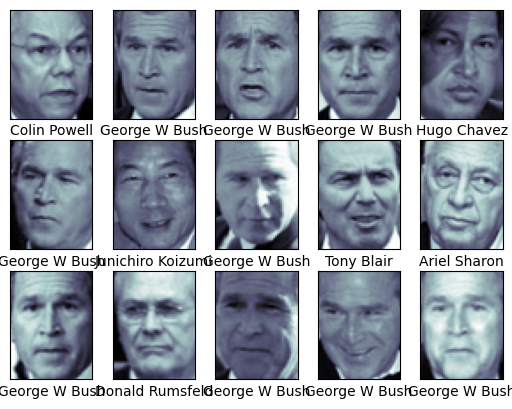

In [24]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Langkah 2 - Pra Pengolahan Data

In [25]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## Langkah 3 - Split Data

In [26]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Langkah 4 - Pembuatan Model + Tunning

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 15s, sys: 394 ms, total: 2min 15s
Wall time: 1min 51s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [28]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Langkah 5 - Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

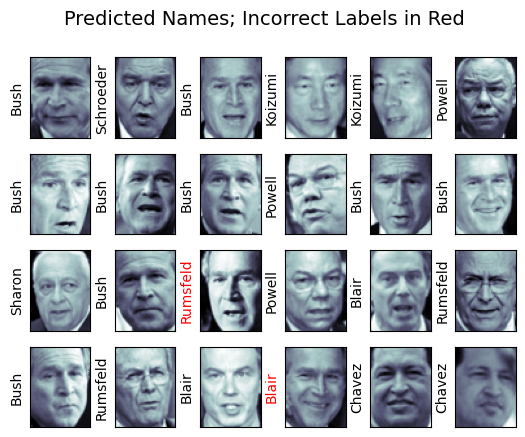

In [29]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Langkah 6 - Cek Performansi

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

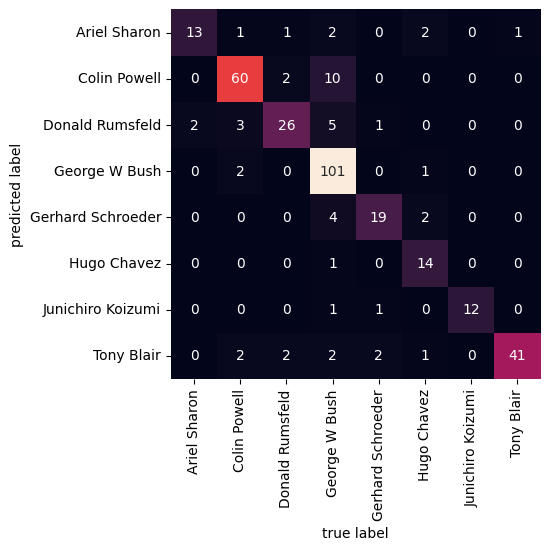

In [31]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# 🌃 Lab 5 Klasifikasi Citra Siang dan Malam

## Langkah 0 - Import Library

In [32]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [33]:
# Image directories
train_dir = "/content/drive/MyDrive/MACHINE LEARNING/p11/images/training/"
test_dir = "/content/drive/MyDrive/MACHINE LEARNING/p11/images/test/"

## Langkah 1 - Load Data dan Visualisasikan

In [34]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [35]:
# Load training data
train_img = load_dataset(train_dir)

In [36]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[173, 181, 184],
         [146, 154, 157],
         [149, 157, 160],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        [[172, 180, 183],
         [146, 154, 157],
         [149, 157, 160],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        [[172, 180, 183],
         [145, 153, 156],
         [148, 156, 159],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        ...,
 
        [[ 42,  42,  34],
         [ 29,  29,  21],
         [ 23,  23,  15],
         ...,
         [ 33,  28,  24],
         [ 35,  30,  26],
         [ 36,  31,  27]],
 
        [[ 45,  45,  37],
         [ 32,  32,  24],
         [ 24,  24,  16],
         ...,
         [ 31,  26,  22],
         [ 33,  28,  24],
         [ 35,  30,  26]],
 
        [[ 48,  48,  40],
         [ 34,  34,  26],
         [ 25,  25,  17],
         ...,
         [ 29,  24,  20],
  

In [37]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 72
(889, 1280, 3)


In [38]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (458, 800, 3)
Label	: night


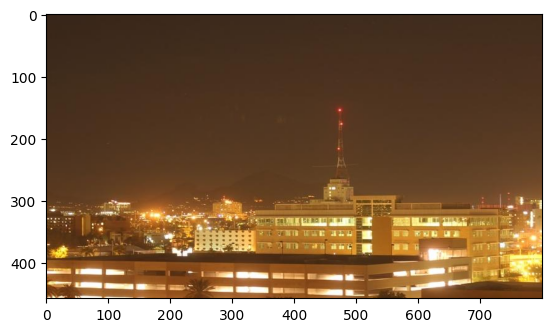

In [39]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

In [40]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [41]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [42]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [43]:
train_std_img_list = preprocess(train_img)

In [44]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 153
(600, 1100, 3)


## Langkah 4 - Ekstraksi Fitur

In [45]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 99
Avg Brighness: 116.6685


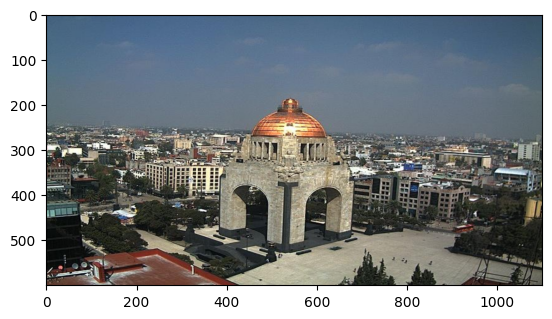

In [46]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

In [47]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 35
Actual label: 1
Predicted label: 1


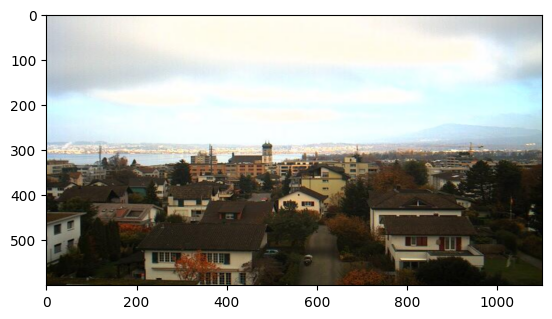

In [48]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi Manual

In [49]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [50]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [51]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


# Klasifikasi dengan SVM

## Langkah 4 Alternatif - Membuat Feature Vectors.

In [52]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [53]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,94.553459,1.0
1,158.018809,1.0
2,139.786038,1.0
3,195.457092,1.0
4,127.947435,1.0


In [54]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,168.672429,1.0
1,128.156468,1.0
2,149.441598,1.0
3,127.443791,1.0
4,109.960342,1.0


## Langkah 5 - Buat Model SVM

In [55]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## Langkah 6 - Evaluasi

In [56]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


In [57]:
model.predict([[99]])

array([0.])

## Save model

In [58]:
import joblib
# load model
joblib.dump(model, 'model_svm.pkl')
model2 = joblib.load('model_svm.pkl')

In [59]:
model2.predict([[72]])

array([0.])

# Tugas lab

## 1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

- Gunakan model dengan kernel linier.

- Gunakan model dengan kernel polynomial.

- Gunakan model dengan kernel RBF.

b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [60]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [61]:
dataset = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/p11/data/voice.csv')
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [63]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, y)
scores = selector.scores_

feature_names = dataset.columns[:-1]
feature_scores = pd.DataFrame({'Feature': feature_names, 'F_Score': scores})
feature_scores = feature_scores.sort_values(by='F_Score', ascending=False)
print(feature_scores)

     Feature      F_Score
12   meanfun  7228.790362
5        IQR  1965.750000
3        Q25  1121.569224
8     sp.ent  1003.308717
1         sd   945.461376
9        sfm   463.923194
11  centroid   406.752820
0   meanfreq   406.752820
2     median   277.588158
17    maxdom   126.024161
16    mindom   125.110999
18   dfrange   121.457858
15   meandom   119.959108
10      mode    96.257909
14    maxfun    90.228036
13    minfun    60.282137
7       kurt    24.255365
4        Q75    14.236082
6       skew     4.252980
19   modindx     3.006445


In [65]:
X_selected = dataset[['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd']]

In [66]:
rasio_test = [0.3, 0.2]
kernel = ['linear', 'rbf', 'poly']

for rt in rasio_test:
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=rt, random_state=42)
    for k in kernel:
        model = SVC(kernel=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'Rasio = {(1 - rt) * 100} : {rt * 100}, Kernel = {k}, Accuracy = {acc}')

Rasio = 70.0 : 30.0, Kernel = linear, Accuracy = 0.9221871713985279
Rasio = 70.0 : 30.0, Kernel = rbf, Accuracy = 0.9695057833859095
Rasio = 70.0 : 30.0, Kernel = poly, Accuracy = 0.9684542586750788
Rasio = 80.0 : 20.0, Kernel = linear, Accuracy = 0.9369085173501577
Rasio = 80.0 : 20.0, Kernel = rbf, Accuracy = 0.9794952681388013
Rasio = 80.0 : 20.0, Kernel = poly, Accuracy = 0.9763406940063092


Rasio 80:20 dan kernel RBF menghasilkan akurasi tertinggi.

## 2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [67]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# Image directories
train_dir = "/content/drive/MyDrive/MACHINE LEARNING/p11/images/training/"
test_dir = "/content/drive/MyDrive/MACHINE LEARNING/p11/images/test/"

In [69]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')  # day, night
    img_list = []

    for dir in dirs:
        label = dir.name
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

In [71]:
train_img = load_dataset(train_dir)

In [72]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [73]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [74]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [75]:
train_std_img_list = preprocess(train_img)

In [76]:
def extract_color_histogram(image, bins=8):
    hist_r = cv2.calcHist([image], [0], None, [bins], [0,256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [bins], [0,256]).flatten()
    hist_b = cv2.calcHist([image], [2], None, [bins], [0,256]).flatten()

    hist = np.concatenate([hist_r, hist_g, hist_b])
    hist = hist / np.sum(hist)
    return hist

In [77]:
features = []
labels = []

for img, lbl in train_std_img_list:
    hist_feat = extract_color_histogram(img)
    features.append(hist_feat)
    labels.append(lbl)

X = np.array(features)
y = np.array(labels)
print("Feature shape:", X.shape)

Feature shape: (240, 24)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 192
Test size: 48


In [79]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi pertama (C=1, gamma='scale'): {acc}")

Akurasi pertama (C=1, gamma='scale'): 0.9791666666666666


In [80]:
C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 0.1, 0.01, 0.001]

best_acc = 0
best_params = (None, None)

for C in C_values:
    for g in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=g)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"C={C}, gamma={g}, Akurasi={acc}")
        if acc > best_acc:
            best_acc = acc
            best_params = (C, g)

print("\n🔹 Best Hyperparameter:")
print(f"C={best_params[0]}, gamma={best_params[1]}, Akurasi={best_acc}")


C=0.1, gamma=scale, Akurasi=0.8958333333333334
C=0.1, gamma=0.1, Akurasi=0.7708333333333334
C=0.1, gamma=0.01, Akurasi=0.7708333333333334
C=0.1, gamma=0.001, Akurasi=0.7708333333333334
C=1, gamma=scale, Akurasi=0.9791666666666666
C=1, gamma=0.1, Akurasi=0.7708333333333334
C=1, gamma=0.01, Akurasi=0.7708333333333334
C=1, gamma=0.001, Akurasi=0.7708333333333334
C=10, gamma=scale, Akurasi=1.0
C=10, gamma=0.1, Akurasi=0.8958333333333334
C=10, gamma=0.01, Akurasi=0.7708333333333334
C=10, gamma=0.001, Akurasi=0.7708333333333334
C=100, gamma=scale, Akurasi=1.0
C=100, gamma=0.1, Akurasi=0.9583333333333334
C=100, gamma=0.01, Akurasi=0.8958333333333334
C=100, gamma=0.001, Akurasi=0.7708333333333334

🔹 Best Hyperparameter:
C=10, gamma=scale, Akurasi=1.0


In [81]:
best_model = SVC(kernel='rbf', C=best_params[0], gamma=best_params[1])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['night', 'day']))


Classification Report:
              precision    recall  f1-score   support

       night       1.00      1.00      1.00        24
         day       1.00      1.00      1.00        24

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

